<h1>Download Data</h1>
We use <a href="https://github.com/gulvarol/grocerydataset">Grocery Dataset</a> collected by Idea Teknoloji, Istanbul, Turkey. It contains 354 tobacco shelves images collected from ~40 locations with 4 cameras.<br>
For the sake of clarity create "data" directory with "images" directory inside. Download and unpack grocery dataset images there.<br>
<p>The images dataset can be downloaded using wget and unpacked using tar:</p>
<ul style="list-style-type:none">
    <li>wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz</li>
    <li>wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz</li>
    <li>tar -xvzf GroceryDataset_part1.tar.gz</li>
    <li>tar -xvzf GroceryDataset_part2.tar.gz</li>
 </ul>
After downloading and unpacking your nn-grocery-shelves/data/images/ directory should appear as follows:
<ul style="list-style-type:none">
    <li>+ your nn-grocery-shelves/data/images/
         <ul style="list-style-type:none">
            <li>+ BrandImages</li>
            <li>+ BrandImagesFromShelves</li>
            <li>+ ProductImages</li>
            <li>+ ProductImagesFromShelves</li>
            <li>+ ShelfImages</li></ul></li></ul>
<br/>
Unfortunately, some of images are rotated. It can be fixed using following commands:
<ul style="list-style-type:none">
<li>convert C1_P03_N1_S2_1.JPG -rotate 180 C1_P03_N1_S2_1.JPG</li>
<li>convert C1_P03_N1_S2_2.JPG -rotate 180 C1_P03_N1_S2_2.JPG</li>
<li>convert C1_P03_N1_S3_1.JPG -rotate 180 C1_P03_N1_S3_1.JPG</li>
<li>convert C1_P03_N1_S3_2.JPG -rotate 180 C1_P03_N1_S3_2.JPG</li>
<li>convert C1_P03_N1_S4_1.JPG -rotate 180 C1_P03_N1_S4_1.JPG</li>
<li>convert C1_P03_N1_S4_2.JPG -rotate 180 C1_P03_N1_S4_2.JPG</li>
<li>convert C1_P03_N2_S3_1.JPG -rotate 180 C1_P03_N2_S3_1.JPG</li>
<li>convert C1_P03_N2_S3_2.JPG -rotate 180 C1_P03_N2_S3_2.JPG</li>
<li>convert C1_P03_N3_S2_1.JPG -rotate 180 C1_P03_N3_S2_1.JPG</li>
<li>convert C1_P12_N1_S2_1.JPG -rotate 180 C1_P12_N1_S2_1.JPG</li>
<li>convert C1_P12_N1_S3_1.JPG -rotate 180 C1_P12_N1_S3_1.JPG</li>
<li>convert C1_P12_N1_S4_1.JPG -rotate 180 C1_P12_N1_S4_1.JPG</li>
<li>convert C1_P12_N1_S5_1.JPG -rotate 180 C1_P12_N1_S5_1.JPG</li>
<li>convert C1_P12_N2_S2_1.JPG -rotate 180 C1_P12_N2_S2_1.JPG</li>
<li>convert C1_P12_N2_S3_1.JPG -rotate 180 C1_P12_N2_S3_1.JPG</li>
<li>convert C1_P12_N2_S4_1.JPG -rotate 180 C1_P12_N2_S4_1.JPG</li>
<li>convert C1_P12_N2_S5_1.JPG -rotate 180 C1_P12_N2_S5_1.JPG</li>
<li>convert C1_P12_N3_S2_1.JPG -rotate 180 C1_P12_N3_S2_1.JPG</li>
<li>convert C1_P12_N3_S3_1.JPG -rotate 180 C1_P12_N3_S3_1.JPG</li>
<li>convert C1_P12_N3_S4_1.JPG -rotate 180 C1_P12_N3_S4_1.JPG</li>
<li>convert C1_P12_N4_S2_1.JPG -rotate 180 C1_P12_N4_S2_1.JPG</li>
<li>convert C1_P12_N4_S3_1.JPG -rotate 180 C1_P12_N4_S3_1.JPG</li>
<li>convert C3_P07_N1_S6_1.JPG -rotate -90 C3_P07_N1_S6_1.JPG</li></ul>

We'll use data from two folders:
<h3>ShelfImages</h3>
Directory contains JPG files named the same way as C3_P06_N3_S3_1.JPG file:
<ul>
    <li>C3_P06 - shelf id</li>
    <li>N3_S3_1 - planogram id</li>
</ul>
<h3>ProductImagesFromShelves</h3>
Directory contains png files grouped by category named the same way as C1_P01_N1_S2_1.JPG_1008_1552_252_376.png file:
<ul>
    <li>C1_P01_N1_S2_1.JPG - shelf photo file</li>
    <li>1008 - x</li>
    <li>1552 - y</li>
    <li>252 - w</li>
    <li>376 - h</li>
</ul>

In [3]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
data_path = 'data/'
# we'll use data from two folders
shelf_images = 'data/images/ShelfImages/'

product_images = 'data/images/ProductImagesFromShelves/'
#product_images = 'data/ProductImages/ProductImagesFromShelves/'

In [5]:
# let's get all shelves photo data from ShelfImages
jpg_files = [f for f in os.listdir(f'{shelf_images}') if f.endswith('JPG')]
photos_df = pd.DataFrame([[f, f[:6], f[7:14]] for f in jpg_files], 
                         columns=['file', 'shelf_id', 'planogram_id'])
photos_df.head()

,file,shelf_id,planogram_id
0,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1
1,C1_P01_N1_S2_2.JPG,C1_P01,N1_S2_2
2,C1_P01_N1_S3_1.JPG,C1_P01,N1_S3_1
3,C1_P01_N1_S3_2.JPG,C1_P01,N1_S3_2
4,C1_P01_N1_S5_1.JPG,C1_P01,N1_S5_1


In [6]:
# let's get products on shelves photo from ProductImagesFromShelves
products_df = pd.DataFrame(
    [[f[:18], f[:6], f[7:14], i, *map(int, f[19:-4].split('_'))] 
     for i in range(11) 
     for f in os.listdir(f'{product_images}{i}') if f.endswith('png')],
    columns=['file', 'shelf_id', 'planogram_id', 
             'category', 'xmin', 'ymin', 'w', 'h'])
# convert from width height to xmax, ymax
products_df['xmax'] = products_df['xmin'] + products_df['w']
products_df['ymax'] = products_df['ymin'] + products_df['h']
products_df.head()

,file,shelf_id,planogram_id,category,xmin,ymin,w,h,xmax,ymax
0,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,1008,1552,252,376,1260,1928
1,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,1028,928,252,376,1280,1304
2,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,24,872,244,392,268,1264
3,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,280,1568,252,376,532,1944
4,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,292,872,252,376,544,1248


<h1>Train/Validation/Test Split</h1>
It's a good practice to split the data into three categories: train (neural network training), validation (monitor training process in order not to over fit our nn) and test (apply final performance checks).<br>
For our purposes we will split the data into train/validation in 70/30 ratio.<br>
Please, note that our data contains many photos of each shelf. In order not to full ourselves, we need to split not by products nor planograms, but by shelves.

In [7]:
# get distinct shelves
shelves = list(set(photos_df['shelf_id'].values))
# use train_test_split from sklearn
shelves_train, shelves_validation, _, _ = train_test_split(
    shelves, shelves, test_size=0.3, random_state=6)
# mark all records in data frames with is_train flag
def is_train(shelf_id): return shelf_id in shelves_train
photos_df['is_train'] = photos_df.shelf_id.apply(is_train)
products_df['is_train'] = products_df.shelf_id.apply(is_train)

The dataset contains 11 classes. Class 0 is "garbage" (unclassified data). Class 1 is Marlboro, 2 - Kent, 3 - Camel etc. It's very important that our split contains enough data for training for each class and also enugh data for validation. So, let's visualize our split. Yellow is for training, blue is for testing. If the split is not OK, please, select another random_state and repeat previous step!

<Axes: ylabel='category'>

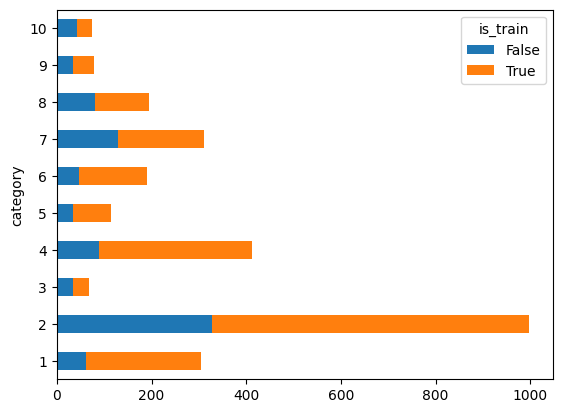

In [8]:
df = products_df[products_df.category != 0].\
         groupby(['category', 'is_train'])['category'].\
         count().unstack('is_train').fillna(0)
df.plot(kind='barh', stacked=True)

In [9]:
# save to pkl
photos_df.to_pickle(f'{data_path}photos.pkl')
products_df.to_pickle(f'{data_path}products.pkl')

In [21]:
# function to display shelf photo with rectangled products
def draw_shelf_photo(file):
    file_products_df = products_df[products_df.file == file]
    coordinates = file_products_df[['xmin', 'ymin', 'xmax', 'ymax']].values
    print(type(coordinates))
    im = cv2.imread(f'{shelf_images}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  
    median_intensity = []  
    for xmin, ymin, xmax, ymax in coordinates:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
        roi = im[ymin:ymin+(ymax-ymin), xmin:xmin+(xmax-xmin)]
        #mean_intensity = roi.mean()
        median_intensity.append(cv2.medianBlur(roi, 5).mean())
    plt.imshow(im)
    print(median_intensity)
   # return coordinates

<class 'numpy.ndarray'>
[85.33440855796626, 61.48909880210598, 103.38492199509743, 84.01533237783238, 75.95185931899641, 105.45446944202085, 57.86156660692951, 103.20022757132132, 47.88115865559187, 114.94021874610495, 87.68680928912784, 109.51795643299549, 99.29478785611352, 130.70671199895887, 112.60553913288288, 71.58816927169937, 166.96132838911427, 112.70107670221493, 77.43630447085455, 109.20153806293574, 106.71147798742139, 92.66424228720732, 111.79455600947934, 108.39602084922451, 81.41269841269842, 104.40733695652175, 106.47246507109789, 104.26334223239257, 60.95940201903106, 76.4225343080672, 102.31427792645455, 105.00604717548077, 46.728775892516225, 79.25175281091018, 98.24023243039105, 98.53646297948261, 102.65746166087963, 56.61203086509202, 58.048371647509576, 87.59214328847482, 57.20996956962759, 73.8618578255675]


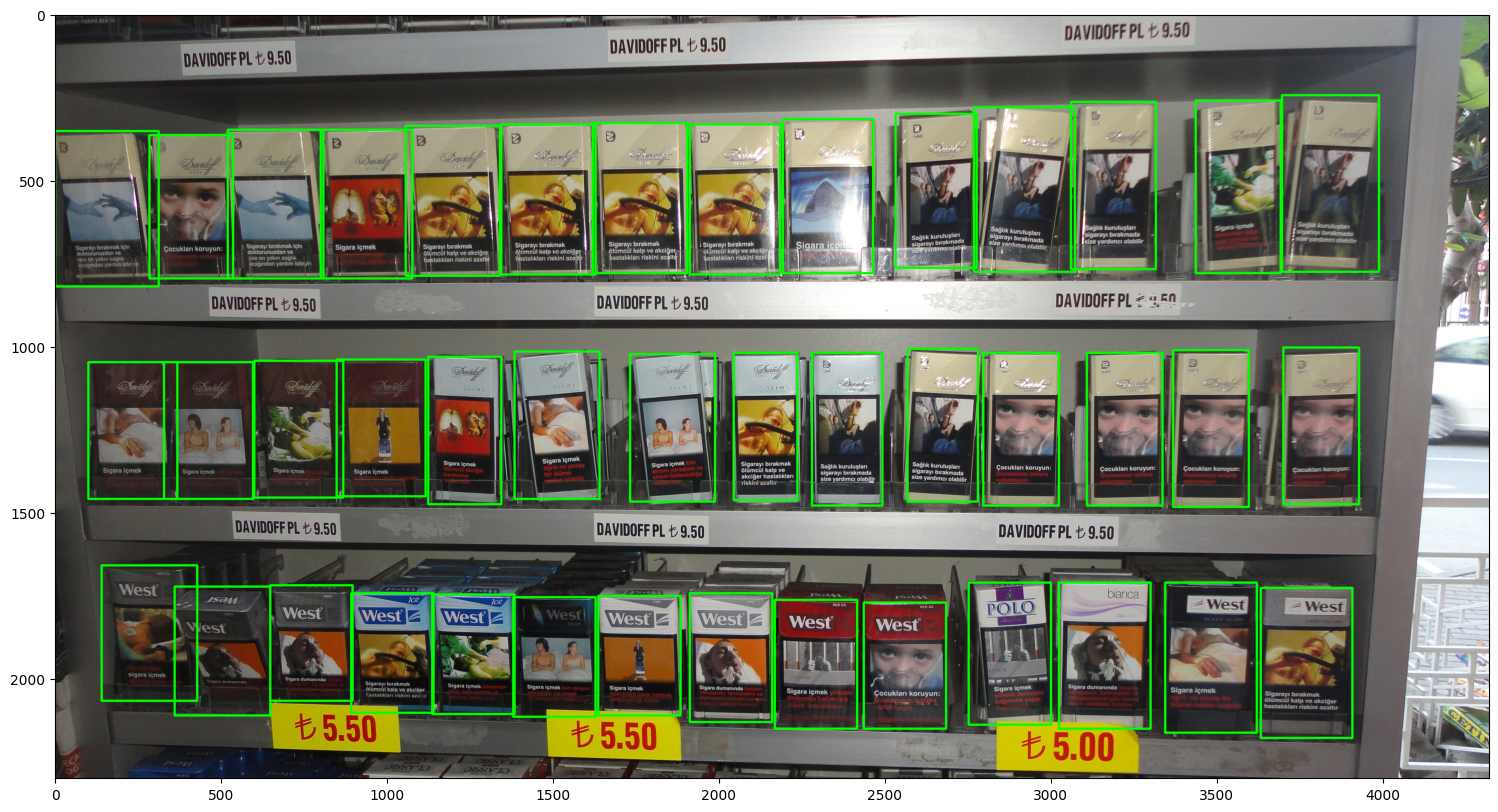

In [22]:
# draw one photo to check our data
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C3_P06_N3_S3_1.JPG')

<class 'numpy.ndarray'>


array([[1164, 1580, 1528, 2132],
       [1196,  652, 1548, 1204],
       [1520, 1592, 1884, 2144],
       [1528,  652, 1880, 1204],
       [1860,  616, 2148, 1168],
       [1872, 1572, 2236, 2124],
       [2128,  616, 2416, 1168],
       [2188, 1572, 2552, 2124],
       [2380,  616, 2668, 1168],
       [2516, 1588, 2828, 2104],
       [2612,  632, 2900, 1184],
       [2828, 1596, 3140, 2112],
       [2912,  620, 3200, 1172],
       [ 456,  608,  808, 1160],
       [ 476, 1592,  840, 2144],
       [ 820, 1588, 1184, 2140],
       [ 844,  640, 1196, 1192],
       [  92, 1600,  456, 2152],
       [  92,  604,  444, 1156]], dtype=int64)

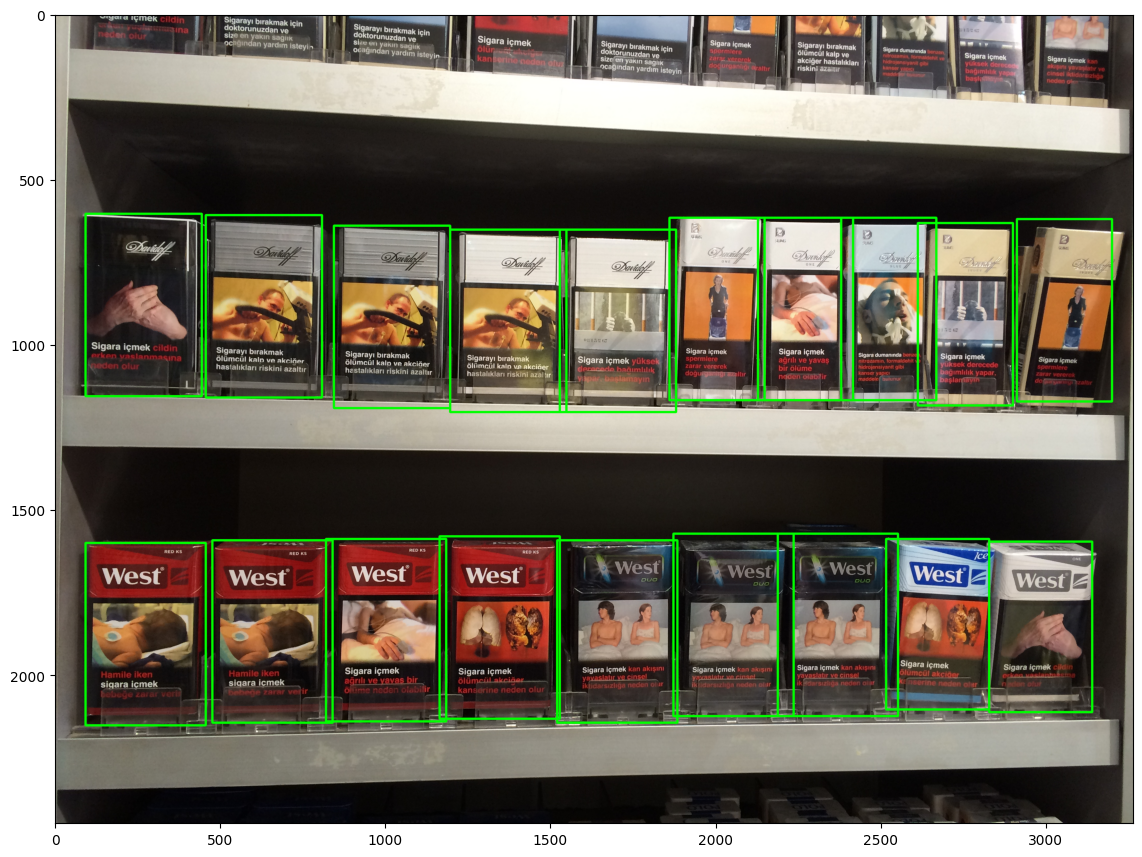

In [12]:
# draw one photo to check our data
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C1_P02_N3_S2_1.JPG')


In [13]:
from PIL import Image 
from pytesseract import pytesseract 

# Defining paths to tesseract.exe 
# and the image we would be using 
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
#image_path = r'D:/Datathon/nn-grocery-shelves/data/images/ShelfImages/C1_P02_N3_S2_1.JPG'
image_path = r'D:/Datathon/test.jpg'

# Opening the image & storing it in an image object 
img = Image.open(image_path) 

# Providing the tesseract 
# executable location to pytesseract library 
pytesseract.tesseract_cmd = path_to_tesseract 

# Passing the image object to 
# image_to_string() function 
# This function will 
# extract the text from the image 
text = pytesseract.image_to_string(img) 

# Displaying the extracted text 
print(text[:-1])


eee eee,

eo 38 cen By liteneive carer

eeee ews
Jnluialve care

a



In [14]:
import cv2
import pytesseract
import spacy

# Load the English NLP model from spaCy
nlp = spacy.load('en_core_web_sm')

def detect_text(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use pytesseract to perform OCR and extract text
    extracted_text = pytesseract.image_to_string(gray_image)
    
    return extracted_text

def find_product_position(text, product_name):
    # Apply NLP to analyze the text and identify entities
    doc = nlp(text)
    
    # Iterate through each token in the document
    for token in doc:
        # Check if the token text matches the product name
        if token.text.lower() == product_name.lower():
            # Return the bounding box coordinates of the token's text region
            return token.idx, token.idx + len(token.text)
    
    # If the product name is not found, return None
    return None, None

# Path to your image
image_path = r'D:/Datathon/test.jpg'

# Detect text in the image
extracted_text = detect_text(image_path)
print("text", extracted_text)

# Product name to search for
product_name = 'Jnluialve'

# Find the position of the product in the extracted text
start_pos, end_pos = find_product_position(extracted_text, product_name)

if start_pos is not None and end_pos is not None:
    print(f"The product '{product_name}' is found in the text at position {start_pos}-{end_pos}.")
else:
    print(f"The product '{product_name}' is not found in the text.")

# Optionally, you can display the extracted text
print("Extracted Text:")
print(extracted_text)

text =
}

| FVasetine. bey


The product 'Jnluialve' is not found in the text.
Extracted Text:
=
}

| FVasetine. bey




In [16]:
import cv2
import pytesseract
import spacy

# Load the English NLP model from spaCy
nlp = spacy.load('en_core_web_sm')

def detect_text(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use pytesseract to perform OCR and extract text
    extracted_text = pytesseract.image_to_string(gray_image)
    
    return extracted_text

def find_product_position(text, product_name):
    # Apply NLP to analyze the text and identify entities
    doc = nlp(text)
    
    # Iterate through each token in the document
    for token in doc:
        # Check if the token text matches the product name
        if token.text.lower() == product_name.lower():
            # Return the bounding box coordinates of the token's text region
            return token.idx, token.idx + len(token.text)
    
    # If the product name is not found, return None
    return None, None

# Path to your image
image_path = r'D:/Datathon/test1.jpg'

# Detect text in the image
extracted_text = detect_text(image_path)

# Display the extracted text
print("Extracted Text:")
print(extracted_text)

# Ask the user to input the text they want to search for
product_name = input("Enter the text you want to find in the image: ")

# Find the position of the product in the extracted text
start_pos, end_pos = find_product_position(extracted_text, product_name)

if start_pos is not None and end_pos is not None:
    print(f"The text '{product_name}' is found in the text at position {start_pos}-{end_pos}.")
else:
    print(f"The text '{product_name}' is not found in the text.")

Extracted Text:
CLINICALLY
PROVEN

Dove
MENS
+CARE.

EXTRA
FRESH
AuripERSoIRANT
DEODORANT

[en sssiea]

Wet 27 01705

Dove

MENY
+CARE

Dove
yy

Jeepmoisture

dy wash

(Eo rota

Dove
MENY
+CARE

FORTIFYING
SHAMPOO +
CONDITIONER

FRESH

2S goounc acune

BODY AND FACEWASH

1958024000

A2FLOZ (B55mL)

Dove

NUTRITIVE
SOLUTIONS

y

if

NEW
Daily
Moisture

Dove

NUTRITIVE
SOLUTION

NEW
LOOK
Daily
Moisture


The text 'dove' is found in the text at position 19-23.
